In [2]:
import pickle
import random 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
'''
Epoch: 50 - Validation
| Epoch: 50 |
| Train Loss: 8.328 | Train Precision: 0.001 | Train Recall: 0.001 | Train F1: 0.001 | Train Acc: 0.13% |
| Val. Loss: 16.218 | Val. Precision: 0.001 | Val. Recall: 0.001 | Val. F1: 0.001 | Val. Acc: 0.12% |
128, 10
Testing
| Test Loss: 11.748 | Test Precision: 0.002 | Test Recall: 0.002 | Test F1: 0.002 | Test Acc: 0.24% |
512, 5
Testing
| Test Loss: 11.962 | Test Precision: 0.003 | Test Recall: 0.003 | Test F1: 0.003 | Test Acc: 0.26% |
1024, 3
Testing
| Test Loss: 12.032 | Test Precision: 0.002 | Test Recall: 0.002 | Test F1: 0.002 | Test Acc: 0.20% |

'''

# 1. Explore parsed data set 

In [336]:
DATA_DIR = 'Data/'
DATASET = 'data_numpy_pandas_sklearn/'
#DATASET = 'data_numpy/'
#DATASET = 'data_small/'
print(DATA_DIR + DATASET)

Data/data_numpy_pandas_sklearn/


In [337]:
with open(DATA_DIR + DATASET + 'parsed/dictionaries', 'rb') as file:
    N_methods = pickle.load(file)
    word_to_counts = pickle.load(file)
    path_to_counts = pickle.load(file)
    target_to_counts = pickle.load(file)
    path_dictionary = pickle.load(file)
    #contexts= pickle.load(file)

In [338]:
methods = []
with open(DATA_DIR + DATASET + 'parsed/methods', 'rb') as file:
    for line in file:
        methods.append(line.decode('utf-8', 'surrogatepass').strip('\n').strip(' ').split(' '))

In [343]:
train = []
test = []
validation = []
with open(DATA_DIR + DATASET + 'split/train', 'rb') as file:
    for line in file:
        train.append(line.decode('utf-8', 'surrogatepass').strip('\n').strip(' ').split(' '))
with open(DATA_DIR + DATASET + 'split/test', 'rb') as file:
    for line in file:
        test.append(line.decode('utf-8', 'surrogatepass').strip('\n').strip(' ').split(' '))
with open(DATA_DIR + DATASET + 'split/validation', 'rb') as file:
    for line in file:
        validation.append(line.decode('utf-8', 'surrogatepass').strip('\n').strip(' ').split(' '))

In [342]:
print(len(train), len(test), len(validation))

22215 2777 2777


In [341]:
N_methods

27769

In [327]:
# methods == contexts

In [328]:
methods[0]

['tarball_name',
 'ftype,-2091857736,gztar',
 'ftype,1775339075,root',
 'gztar,-213430978,root',
 'gztar,582713598,numpy-%s',
 'root,-2074781240,numpy-%s',
 'None,674597601,root',
 'None,-975917381,numpy-%s',
 'numpy-%s,1693876507,FULLVERSION',
 'FULLVERSION,-1203202347,None',
 'None,649088354,ftype',
 'FULLVERSION,-1731309895,ftype',
 'None,2043661008,ftype',
 'ftype,1714443454,gztar',
 'gztar,-874160236,None',
 'None,-1790038289,root',
 'gztar,228929780,root',
 'gztar,700109080,None',
 'None,1944696651,root',
 'root,-796648517,.tar.gz',
 '.tar.gz,-20142845,None',
 '.tar.gz,-1845718484,ftype',
 'None,-196285107,.tar.gz',
 'None,-964443952,ftype',
 'ftype,1714443454,zip',
 'None,1393063406,zip',
 'None,-1130973885,root',
 'zip,228929780,root',
 'None,-1025533365,root',
 'root,-796648517,.zip',
 'None,1029102577,.zip',
 '.zip,-238708682,ValueError',
 'ValueError,-1619267145,Unknowntype%s',
 'None,1645106145,ValueError',
 'None,1085311101,Unknowntype%s',
 'Unknowntype%s,1693876507,type',

In [202]:
'\ud8ddfoo'.replace('\\u', '\\u')

'\ud8ddfoo'

In [215]:
ss = '\ud800foo,1933286902,ser'
ss.encode('utf-8', 'surrogatepass').decode('utf-8', 'surrogatepass')

'\ud800foo,1933286902,ser'

In [212]:
'sddfdf'.encode('utf-8', 'surrogatepass').decode('utf-8', 'surrogatepass')

'sddfdf'

In [199]:
ss.encode('utf-8')

UnicodeEncodeError: 'utf-8' codec can't encode character '\ud800' in position 0: surrogates not allowed

In [238]:
with open('zhang.txt', 'wb') as file:
    for id, line in enumerate(contexts):
        for item in line:
            #print(item)
            file.write(item.encode('utf-8', 'surrogatepass') + ' '.encode('utf-8', 'surrogatepass'))
        file.write('\n'.encode('utf-8', 'surrogatepass'))

In [246]:
methods = []
with open('zhang.txt', 'rb') as file:
    for line in file:
        methods.append(line.decode('utf-8', 'surrogatepass').strip('\n').strip(' ').split(' '))

In [247]:
methods[0]

['safe_remove',
 'path,-1456136408,path',
 'path,2100300876,None',
 'path,-1696578410,None',
 'path,1603370850,None',
 'None,371816868,None',
 'None,-73889772,os',
 'None,605097742,os',
 'None,-1951218462,path',
 'os,371717944,path',
 'os,-1968594705,OSError',
 'path,2128612142,OSError',
 'path,2128671924,None',
 'OSError,-566086864,None']

In [248]:
contexts == methods

True

In [111]:
with open('data3/parsed/dictionaries', 'rb') as file:
    path_dictionary = pickle.load(file)
    word_to_counts = pickle.load(file)
    path_to_counts = pickle.load(file)
    target_to_counts = pickle.load(file)
    N_methods = pickle.load(file)
    contexts= pickle.load(file)

In [112]:
contexts_ = []
with open('data3/parsed/methods', 'r') as file:
    for line in file:
        contexts_.append(line.rstrip('\n').split(' '))

In [113]:
for line in contexts:
    for item in line[1:]:
        if len(item.split(',')) !=3:
            print (line)
            print(line[0])

In [114]:
contexts == contexts_

True

In [112]:
N_methods

27769

In [126]:
np.max([len(i)-1 for i in contexts])

2349

217057

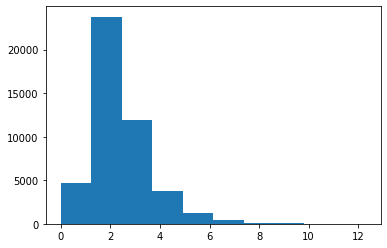

In [113]:
# plt.hist(word_to_counts.values())
plt.hist([np.log(i) for i in word_to_counts.values()])
max(word_to_counts.values())

96991

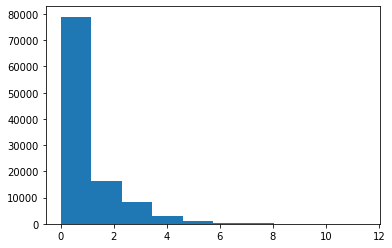

In [114]:
# plt.hist(path_to_counts.values())
plt.hist([np.log(i) for i in path_to_counts.values()])
max(path_to_counts.values())

31

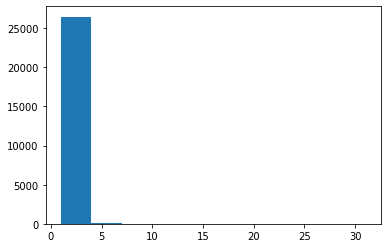

In [115]:
plt.hist(target_to_counts.values())
#plt.hist([np.log(i) for i in target_to_counts.values()])
max(target_to_counts.values())

In [260]:
with open('aa', 'ab') as file:
    file.write('abc\n'.encode('utf-8'))
    

# 3. split data 

In [34]:
# split into train, validate and test
SEED = 1022
random.seed(SEED)
random.shuffle(contexts) 
train = contexts[0: int(len(contexts)*.6)]
validation = contexts[int(len(contexts)*.6): int(len(contexts)*.8)]
test = contexts[int(len(contexts)*.8): ]

In [50]:
# write into files
path_list = ['data/train.txt', 'data/test.txt', 'data/validation.txt']
for path in path_list:
    if os.path.exists(path): 
        os.remove(path)
with open('data/train.txt', 'w') as file:
    for item in train:
        file.write(' '.join(item) + '\n')
with open('data/test.txt', 'w') as file:
    for item in test:
        file.write(' '.join(item) + '\n')
with open('data/validation.txt', 'w') as file:
    for item in validation:
        file.write(' '.join(item) + '\n')

In [52]:
# read train
train = []
with open('data/train.txt', 'r') as file:
    for line in file:
        train.append(line.rstrip('\n').split(' '))

In [56]:
# write into binary files 
with open('data/train', 'wb') as file:
    pickle.dump(train, file)
with open('data/test', 'wb') as file:
    pickle.dump(test, file)
with open('data/validation', 'wb') as file:
    pickle.dump(validation, file)

In [57]:
# read
with open('data/train', 'rb') as file:
    train = pickle.load(file)
with open('data/test', 'rb') as file:
    test = pickle.load(file)
with open('data/validation', 'rb') as file:
    validation = pickle.load(file)

In [315]:
# with open('testfile.txt', 'w') as file:
#     for line in list1:
#         file.write('%s\n' % line)

In [133]:
x, *y = [2,1,2,3]

In [135]:
y

[1, 2, 3]

# Code Embeddings

In [68]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from random import sample

In [85]:
# Embeddings trained on 15 examples, training accuracy 1, testing: 0.0385
with open('../code2vec/IR_small', 'rb') as file:
    vectors = pickle.load(file)

In [86]:
with open('data3/split_small/train', 'rb') as file:
    train = pickle.load(file)
    n_train = pickle.load(file)

In [49]:
label = [item[0] for item in train]

In [50]:
label

['trim',
 'hermeder',
 'hermroots',
 'ABCPolyBase___pos__',
 'TestMisc_test_leg2poly',
 'TestCompanion_test_linear_root',
 'TestMisc_test_herm2poly',
 'TestEvaluation_test_hermval2d',
 'TestMisc_test_chebtrim',
 'lagsub',
 'TestVander_test_lagvander3d',
 'test_copy',
 '_cseries_to_zseries',
 'TestConstants_test_polyzero',
 'chebpts1']

In [52]:
vectors = np.array(vectors)

In [53]:
# find k-nn 
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(vectors)
distances, indices = nbrs.kneighbors(vectors)

In [57]:
indices

array([[ 0,  2,  7],
       [ 1, 14,  7],
       [ 2,  5, 14],
       [ 3, 14,  6],
       [ 4,  6,  2],
       [ 5,  2, 14],
       [ 6,  4,  2],
       [ 7, 14,  2],
       [ 8,  5,  2],
       [ 9,  2, 14],
       [10,  7, 14],
       [11,  5,  2],
       [12,  2, 14],
       [13,  2, 14],
       [14,  2,  7]])

In [58]:
for row in indices:
    for item in row:
        print (label[item])
    print('\n')

trim
hermroots
TestEvaluation_test_hermval2d


hermeder
chebpts1
TestEvaluation_test_hermval2d


hermroots
TestCompanion_test_linear_root
chebpts1


ABCPolyBase___pos__
chebpts1
TestMisc_test_herm2poly


TestMisc_test_leg2poly
TestMisc_test_herm2poly
hermroots


TestCompanion_test_linear_root
hermroots
chebpts1


TestMisc_test_herm2poly
TestMisc_test_leg2poly
hermroots


TestEvaluation_test_hermval2d
chebpts1
hermroots


TestMisc_test_chebtrim
TestCompanion_test_linear_root
hermroots


lagsub
hermroots
chebpts1


TestVander_test_lagvander3d
TestEvaluation_test_hermval2d
chebpts1


test_copy
TestCompanion_test_linear_root
hermroots


_cseries_to_zseries
hermroots
chebpts1


TestConstants_test_polyzero
hermroots
chebpts1


chebpts1
hermroots
TestEvaluation_test_hermval2d




In [94]:
# Embeddings trained on 5030 examples, training accuracy:0.7545 , testing: 0.0394
with open('../code2vec/IR', 'rb') as file:
    vectors = pickle.load(file)
with open('data2/split/train', 'rb') as file:
    train = pickle.load(file)
    n_train = pickle.load(file)
label = [item[0] for item in train]

In [95]:
vectors.shape

(5030, 128)

In [96]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(vectors)

In [103]:
subset = sample(range(0, n_train), 5)
distances, indices = nbrs.kneighbors(vectors[subset,])
for row in indices:
    for item in row:
        print (label[item])
    print('\n')

TestLinearRamp_test_check_2d
TestMultinomial_test_zero_probability
TestMultinomial_test_zero_probability
TestAsIntegerRatio_test_simple_fractions
test_zeros
RNG_test_uniform
_savez
TestRandomDist_test_poisson
TestRandomDist_test_lognormal
TestRandomDist_test_standard_exponential


delete
rate
TestSizeSumExample_test_flatten
_savez
TestSizeSumExample_test_all
TestResize_test_0d_shape
TestIsnan_test_ind
TestIsfinite_test_ind
test_divmod
TestArithmetic_test_chebdiv


build_ext__add_dummy_mingwex_sym
TestMedian_test_nan
TestResize_test_0d_shape
_savez
RNG_test_exponential
RNG_test_chisquare
TestFancyIndexing_test_assign_mask
put
TestMaskedArrayFunctions_test_masked_where_condition
_as_pairs


TestLstsq_test_incompatible_dims
TestPiecewise_test_0d_0d_condition
TestArrayAlmostEqualNulp_test_float16_pass
TestArrayAlmostEqualNulp_test_float16_fail
TestArrayAlmostEqualNulp_test_float64_fail
TestInner_test_inner_type_mismatch
logspace
legfit
hermefit
hermevander3d


rel_path
TestPickling_test_st